In [1]:
%pylab inline

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True


# Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib.patches import Polygon
import scipy.stats
import vcf
import seaborn as sns
sns.set(style="ticks")

Populating the interactive namespace from numpy and matplotlib


In [2]:
hipstr_to_tp_id = {"Expansion_ATN1/DRPLA":"DRPLA",
"Expansion_SCA2/ATXN2":"SCA2",
"Expansion_SCA8/ATXN8":"SCA8",
"Expansion_SCA3_MJD/ATXN3":"SCA3",
"Expansion_HDL2/JPH3":"HDL",
"Expansion_DM1/DMPK":"DM1",
"Expansion_SCA1/ATXN1":"SCA1",
"Expansion_SCA12/PPP2R2B":"SCA12",
"Expansion_SCA7/ATXN7":"SCA7"}

hipstr_loci = [('12', 7045880),
('12', 112036754),
('13', 70713484),
('14', 92537353),
('16', 87637889),
('19', 46273457),
('6', 16327865),
('5', 146258291),
('3', 63898361)]

def returnAFDF(locus, algo, af):
    return pd.DataFrame({'locus':[locus]*len(af), 'algorithm':[algo]*len(af), 'allele':af})

afData = pd.DataFrame()

vcf_reader = vcf.Reader(filename='/storage/s1saini/manuscript_strsnp/fig3/tredparse_calls/tredparse.output_gt.vcf.gz')
for record in vcf_reader:
    print(record.ID, len(record.REF))
    allele_list = []
    num_called = (record.num_called)
    aaf = dict(zip([len(x) for x in record.ALT],record.aaf))
    aaf[len(record.REF)] = 1-np.sum(record.aaf)
    for x in aaf:
        allele_list = allele_list + [x-len(record.REF)]*int(aaf[x]*num_called*2)
    afData = pd.concat([afData, returnAFDF(record.ID, "TredParse", allele_list)])
    

for hip_locus in hipstr_loci:
    file = '/storage/s1saini/hipstr_rerun/chr'+hip_locus[0]+'/hipstr.chr'+hip_locus[0]+'.with.1kg.filtered.vcf.gz'
    vcf_reader = vcf.Reader(filename=file)
    for record in vcf_reader.fetch(hip_locus[0], hip_locus[1]-1, hip_locus[1]+1):
        allele_list = []
        num_called = (record.num_called)
        aaf = dict(zip([len(x) for x in record.ALT],record.aaf))
        aaf[len(record.REF)] = 1-np.sum(record.aaf)
        for x in aaf:
            allele_list = allele_list + [x-len(record.REF)]*int(aaf[x]*num_called*2)
        afData = pd.concat([afData, returnAFDF(hipstr_to_tp_id[record.ID], "HipSTR", allele_list)])

DRPLA 45
SCA2 69
SCA8 45
HPE5 45
SCA3 24
HDL 42
SCA6 39
DM1 60
HD 57
SCA1 87
CCD 51
SCA17 114
EIEE1 30
SBMA 66
AR 66
FXTAS 60
FXS 60
FRAXE 45
SCA12 30
SCA7 30
SD5 45
HFG 42


In [3]:
## https://www.sciencedirect.com/science/article/pii/S0304394007010518
control_size = 307
cag_size = 3

control_sca1 = [29]*int(0.06*307) + [30]*int(0.31*307) + [31]*int(0.37*307) + [32]*int(0.09*307) + [33]*int(0.09*307) + [34]*int(0.03*307) + [35]*int(0.02*307)
control_sca2 = [22]*int(0.89*307) + [23]*int(0.09*307)
control_sca3 = [14]*int(0.24*307) + [20]*int(0.06*307) + [21]*int(0.09*307) + [22]*int(0.02*307) + [23]*int(0.26*307) + [24]*int(0.06*307) + [26]*int(0.02*307) + [27]*int(0.16*307) + [28]*int(0.04*307) 
control_sca6 = [7]*int(0.075*307) + [11]*int(0.37*307) + [12]*int(0.19*307) + [13]*int(0.32*307) + [14]*int(0.04*307)
#control_sca4 = [10]*int(0.76*307) + [11]*int(0.04*307) + [12]*int(0.14*307) + [13]*int(0.06*307)
#control_sca10 = [10]*int(0.02*307) + [11]*int(0.09*307) + [12]*int(0.27*307) + [13]*int(0.29*307) + [14]*int(0.16*307) + [15]*int(0.08*307) + [16]*int(0.05*307) + [17]*int(0.02*307) + [18]*int(0.02*307)
control_sca12 = [9]*int(0.02*307) + [10]*int(0.59*307) + [11]*int(0.01*307)  + [13]*int(0.11*307) + [14]*int(0.09*307) + [15]*int(0.15*307) + [16]*int(0.01*307) + [18]*int(0.02*307)
control_sca17 = [30]*int(0.02*307) + [33]*int(0.06*307) + [34]*int(0.15*307)  + [35]*int(0.26*307) + [36]*int(0.41*307) + [37]*int(0.06*307) + [38]*int(0.01*307)
control_sca8 = [18]*int(0.16*307) + [19]*int(0.02*307) + [21]*int(0.01*307)  + [23]*int(0.23*307) + [24]*int(0.10*307) + [25]*int(0.13*307) + [26]*int(0.11*307) + [27]*int(0.08*307)  + [28]*int(0.06*307) + [29]*int(0.04*307) + [30]*int(0.02*307) + [32]*int(0.01*307)
control_drpla = [8]*int(0.12*307) + [10]*int(0.11*307) + [11]*int(0.01*307)  + [12]*int(0.02*307) + [13]*int(0.01*307) + [14]*int(0.04*307) + [15]*int(0.37*307) + [16]*int(0.20*307)  + [17]*int(0.07*307) + [18]*int(0.01*307) + [19]*int(0.02*307) + [20]*int(0.02*307)

## https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5387946/ CHINESE
control_dm1 = [5]*31+[11]*14+[12]*30+[13]*14+[14]*3+[15]*5+[16]*1+[24]*1+[27]*1

## dbgap
control_htt = [int(item.strip()) for item in open("/storage/s1saini/manuscript_strsnp/fig3/tredparse_calls/htt_control_freqs.txt").readlines()]


## https://watermark.silverchair.com/7-3-525.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAcIwggG-BgkqhkiG9w0BBwagggGvMIIBqwIBADCCAaQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMQVRCTPBR23c3gocMAgEQgIIBdU-nNh98c-PvRwlhyJ1hcujN4Rerxl2-qN-Z_oLzrHn6I84wQh_hH8Y4mqDSALsBsGoINdN3AJlRfvnVgqrI6Jp5dOUWxytgIRn43lXiTPqM-CB66M913J9fZhcZF9XcxvW_UUsqtfKLi5GMbS3LWgKBi8aTQgn6w6zNB3nG5QfMu36TM1AUVuBCbBzx_MmE05OQj6Se_z7kxcH_lsqyotGE1znYgifTxCZ12bj2RtyuRE6ImShOWsYEDapbiXzssmTmoUPKmVUjSpbvU92yWje8Iu8abOPT-9W_Bmx-xavBnxH5lEo4HlvoL3qxtkm2KMYKbNE_YTS_03zNUO6lWa63OLyUvmlo-G-6QV5pZq967P_Z8ray2MwfoFfri21184LzL5BSXDwEB_uGYl0Fkl6hngGw0OMVANy-kscUuEh8sA4dj1YE5dTpCVEk2e2dZc0AIE7eXj30q3BQHy2USmZsX6aqdspRDjZFeWGOo1rQeEeoAa8
# Analysis of the dynamic mutation in the SCA7 gene
#shows marked parental effects on CAG repeat
#transmission
ctrl_size2 = 144
control_sca7 = [8]*(int(0.05*ctrl_size2))+[9]*(int(0.01*ctrl_size2))+\
    [10]*(int(0.55*ctrl_size2))+[11]*(int(0.15*ctrl_size2))+\
    [12]*(int(0.13*ctrl_size2))+[13]*(int(0.13*ctrl_size2))

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3880650/
control_hdl= [11]*int(0.03*352) + [14]*int(0.53*352) + [15]*int(0.05*352) + [16]*int(0.28*352) + [17]*int(0.07*352) + [18]*int(0.01*352)

sca1_length = 87
sca2_length = 69
sca3_length = 24+18 # adding imperfect region next to it
sca6_length = 39
#sca4_length = 0
#sca10_length = 0
sca12_length = 30
sca17_length = 114
sca8_length = 78 #45 changing since also has "TAC" repeat next to it
drpla_length = 45
dm1_length = 60
#htt_length = 0
hdl_length = 42
htt_length = 57
sca7_length = 30

afData = pd.concat([afData, returnAFDF("SCA1", "Control", [x*3-sca1_length for x in control_sca1])])
afData = pd.concat([afData, returnAFDF("SCA2", "Control", [x*3-sca2_length for x in control_sca2])])
afData = pd.concat([afData, returnAFDF("SCA3", "Control", [x*3-sca3_length for x in control_sca3])])
afData = pd.concat([afData, returnAFDF("SCA6", "Control", [x*3-sca6_length for x in control_sca6])])
afData = pd.concat([afData, returnAFDF("SCA12", "Control", [x*3-sca12_length for x in control_sca12])])
afData = pd.concat([afData, returnAFDF("SCA17", "Control", [x*3-sca17_length for x in control_sca17])])
afData = pd.concat([afData, returnAFDF("SCA8", "Control", [x*3-sca8_length for x in control_sca8])])
afData = pd.concat([afData, returnAFDF("DRPLA", "Control", [x*3-drpla_length for x in control_drpla])])
afData = pd.concat([afData, returnAFDF("DM1", "Control", [x*3-dm1_length for x in control_dm1])])
afData = pd.concat([afData, returnAFDF("HDL", "Control", [x*3-hdl_length for x in control_hdl])])
afData = pd.concat([afData, returnAFDF("HD", "Control", [x*3-htt_length for x in control_htt])])
afData = pd.concat([afData, returnAFDF("SCA7", "Control", [x*3-sca7_length for x in control_sca7])])

HD 17.0 18.0 Ttest_indResult(statistic=-0.04357719567278365, pvalue=0.9652436031033031)
SCA1 30.0 31.0 Ttest_indResult(statistic=-7.162193345371833, pvalue=9.533985514447339e-13)
SCA17 37.0 35.0 Ttest_indResult(statistic=8.233534034612386, pvalue=2.52253196225264e-16)
SCA2 22.0 22.0 Ttest_indResult(statistic=1.344936697552033, pvalue=0.17872052402034058)
DRPLA 15.0 15.0 Ttest_indResult(statistic=-2.1273713583170375, pvalue=0.03345645065291013)
SCA8 25.0 24.0 Ttest_indResult(statistic=4.572857284527722, pvalue=4.9601204229938e-06)
SCA3 23.0 23.0 Ttest_indResult(statistic=2.3742588637569195, pvalue=0.017632560996789663)
DM1 11.0 12.0 Ttest_indResult(statistic=0.6793745354097702, pvalue=0.49694064111705294)
SCA6 11.0 12.0 Ttest_indResult(statistic=-2.5831264562647713, pvalue=0.009828450448721077)
SCA7 11.0 10.0 Ttest_indResult(statistic=3.2820884163210318, pvalue=0.0010503908534191843)
SCA12 13.0 10.0 Ttest_indResult(statistic=4.763949394132788, pvalue=1.99494946890663e-06)
HDL 16.0 14.0 

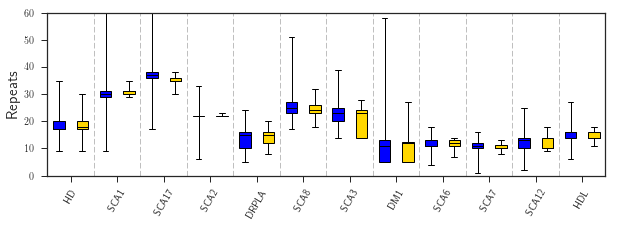

In [8]:
#

#loci = set(afData["locus"])
loci = ["HD", "SCA1","SCA17","SCA2","DRPLA","SCA8","SCA3","DM1","SCA6","SCA7","SCA12","HDL"]
ref_len = {
    "HD": htt_length,
    "SCA1": sca1_length,
    "SCA17": sca17_length,
    "SCA2": sca2_length,
    "DRPLA": drpla_length,
    "SCA8": sca8_length,
    "SCA3": sca3_length,
    "DM1": dm1_length,
    "SCA6": sca6_length,
    "SCA7": sca7_length,
    "SCA12": sca12_length,
    "HDL": hdl_length
}
data = []
labels = []
for locus in loci:
    tp = []
    ct = []
    for algorithm in "TredParse","Control":
        x = (np.array(list(afData[(afData["algorithm"]==algorithm) & (afData["locus"]==locus)]["allele"]))+ref_len[locus])/3
        data.append(x)
        if algorithm == "TredParse":
            tp = x
            labels.append(locus)
        else:
            ct = x
            labels.append("")
    print("%s %s %s %s"%(locus, np.median(tp), np.median(ct), scipy.stats.ttest_ind(tp, ct)))
    
fig = plt.figure()
fig.set_size_inches((10, 3))
ax = fig.add_subplot(111)
bplot = ax.boxplot(data, whis="range", patch_artist=True, medianprops={"color":"black"});
ax.set_ylim(bottom=0, top=60);

colors = ["blue","gold"]*len(loci)
for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
ax.set_xticks(np.arange(1.5, len(loci)*2+0.5, 2));
ax.set_xticklabels(loci, rotation=60);
for i in np.arange(2.5, len(loci)*2, 2): ax.axvline(x=i, color="gray", linestyle="dashed", linewidth=0.5)
ax.set_ylabel("# Repeats", size=15);
fig.savefig(os.path.join("pdfs","Figure1_TP.pdf"))
# Need to fix
# SCA8 - had other repeat next to it that was counted
# SCA3
# SCA7 no controls
